In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\hp\Downloads\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<AxesSubplot:>

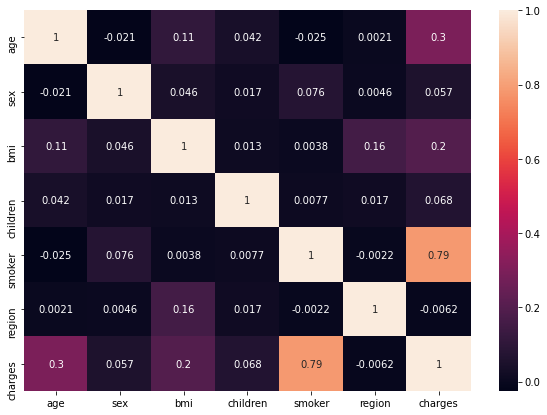

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
import statsmodels.formula.api as smf
model = smf.ols(formula='charges~age+sex+bmi+children+smoker+region',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:12:31   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.182e+04    955.130    -12.371      0.000   -1.37e+04   -9941.729
age          257.2881     11.886     21.647      0.000     233.971     280.605
sex         -131.1106    332.811     -0.394      0.694    -784.001     521.780
bmi          332.5701     27.722     11.997      0.000     278.186     386.954
children     479.3694    137.644      3.483      0.001     209.346     749.393
smoker      2.382e+04    411.843     57.839      0.000     2.3e+04    2.46e+04
region      -353.6400    151.927     -2.328      0.020    -651.682     -55.598
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df=df.drop(['sex'],axis=1)
df

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,3,16884.92400
1,18,33.770,1,0,2,1725.55230
2,28,33.000,3,0,2,4449.46200
3,33,22.705,0,0,1,21984.47061
4,32,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...
1333,50,30.970,3,0,1,10600.54830
1334,18,31.920,0,0,0,2205.98080
1335,18,36.850,0,0,2,1629.83350
1336,21,25.800,0,0,3,2007.94500


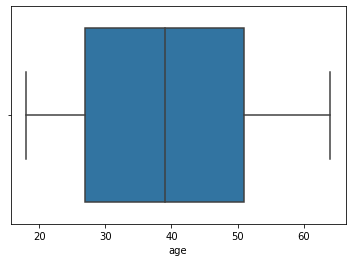

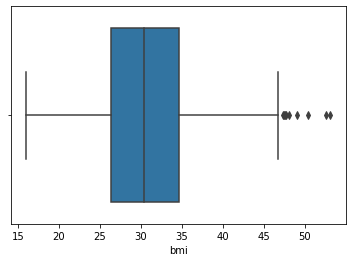

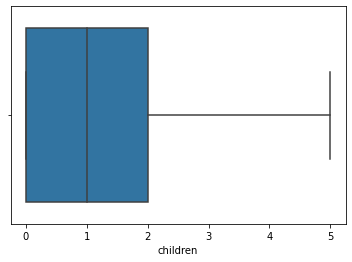

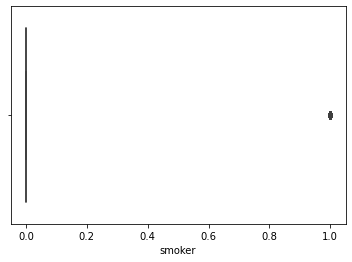

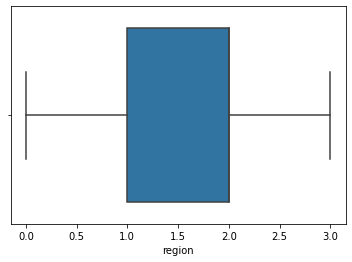

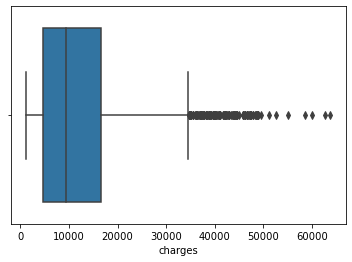

In [11]:
for i in df:
    sns.boxplot(df[i])
    plt.show()

In [40]:
x = df.drop(['charges'],axis=1).values
y = df['charges']

In [41]:
x

array([[19.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [42]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45)

In [44]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 5) (1003, 5) (335, 5)


In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(y_test,model.predict(x_test))

0.7065850186194346

In [48]:
r2_score(y_train,model.predict(x_train))

0.7623612733629417

In [49]:
from xgboost import XGBRegressor

In [50]:
xg = XGBRegressor(max_depth=2)
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [51]:
y_pred = xg.predict(x_test)

In [52]:
r2_score(y_test,y_pred)

0.8399921328057571

In [53]:
r2_score(y_train,xg.predict(x_train))

0.9034451562348957

Text(0.5, 1.0, 'Prediction')

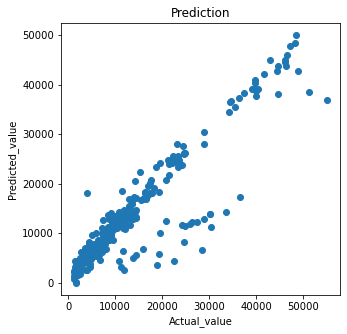

In [54]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
#plt.plot(y_test,xg.predict(x_test))

plt.xlabel('Actual_value')
plt.ylabel('Predicted_value')
plt.title('Prediction')

Text(0.5, 1.0, 'Actual vs Predicted')

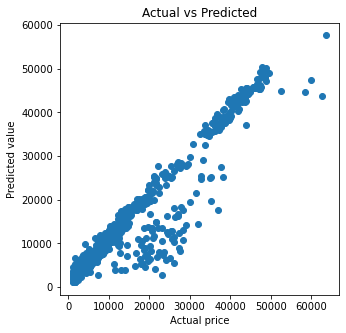

In [55]:
plt.figure(figsize=(5,5))
plt.scatter(y_train,xg.predict(x_train))
#plt.plot(y_train,xg.predict(x_train))
plt.xlabel('Actual price')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted')

In [56]:
from sklearn.model_selection import GridSearchCV
xg =  XGBRegressor()
grid = dict()
grid['max_depth'] = np.arange(0,5,1)

In [57]:
search = GridSearchCV(xg,grid,cv=5)

In [58]:
results = search.fit(x_train,y_train)

In [59]:
results.best_params_

{'max_depth': 2}

In [60]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [61]:
l1 = Ridge(alpha=0.0001)
l1.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [62]:
r2_score(y_test,l1.predict(x_test))

0.7065850895064079

In [63]:
r2_score(y_train,l1.predict(x_train))

0.7623612733627083

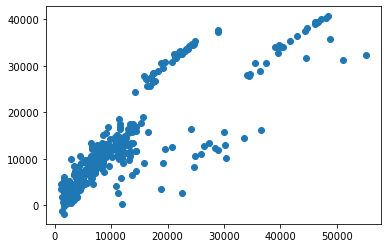

In [64]:
plt.scatter(y_test,l1.predict(x_test))

In [72]:
pd.DataFrame({'actula':y_test,'predicted':y_pred})

,actula,predicted
910,2639.04290,3787.997070
823,8219.20390,9205.941406
677,46130.52650,44631.269531
559,1646.42970,2808.124023
1169,6112.35295,7429.512695
...,...,...
507,3077.09550,4475.249023
948,6358.77645,6065.052734
197,8516.82900,10332.039062
1198,6393.60345,6568.036133
